<a href="https://colab.research.google.com/github/alouvre/BPDS_DicodingSubmission_Proyek_Pertama_Dashboard_HR/blob/main/BPDS_Submission_Proyek_Pertama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Pertama : Menyelesaikan Permasalahan departemen Human Resources (HR) di Perusahaan Jaya Maju

- Nama: Alifia Mustika Sari
- Email: alifiamustika02@gmail.com
- ID Dicoding:

## Business Understanding

### Latar Belakang

Jaya Jaya Maju adalah perusahaan multinasional yang telah beroperasi sejak tahun 2000 dengan lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. Meskipun telah menjadi perusahaan besar, Jaya Jaya Maju masih menghadapi tantangan serius dalam pengelolaan karyawan. Salah satu indikator utama dari permasalahan ini adalah tingginya tingkat attrition rate (rasio karyawan yang keluar terhadap total karyawan), yang mencapai lebih dari 10%.

Tingginya angka ini dikhawatirkan akan berdampak pada produktivitas, efisiensi operasional, dan stabilitas perusahaan dalam jangka panjang. Oleh karena itu, manajemen HR ingin mengidentifikasi faktor-faktor utama yang memengaruhi tingginya tingkat pergantian karyawan dan membuat sistem pemantauan yang efektif.

### Permasalahan Bisnis

Bagaimana Jaya Jaya Maju dapat mengurangi tingkat pergantian karyawan yang tinggi untuk meningkatkan produktivitas, efisiensi operasional, dan stabilitas bisnisnya di masa depan?

Pertanyaan utama ini dapat diuraikan menjadi beberapa sub-masalah:
- Apa faktor-faktor utama yang menyebabkan tingginya tingkat attrition di Jaya Jaya Maju?
- Bagaimana kepuasan kerja, keseimbangan kehidupan kerja, pengembangan karir, dan budaya organisasi saat ini mempengaruhi keputusan karyawan untuk tetap atau keluar dari perusahaan?
- Strategi apa yang dapat diterapkan oleh manajemen untuk meningkatkan retensi dan kepuasan karyawan?
- Bagaimana model machine learning dapat membantu memprediksi risiko karyawan keluar dari perusahaan secara dini?

### Tujuan Proyek

- Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap tingginya attrition rate.
- Menyediakan alat bantu visual berupa dashboard interaktif untuk membantu HR memantau tren dan distribusi data karyawan.
- Mengembangkan model prediktif yang dapat membantu perusahaan dalam pengambilan keputusan strategis terkait retensi karyawan.

### Cakupan Proyek

Untuk menjawab permasalahan di atas, proyek ini memiliki dua fokus utama:

- Pembuatan Business Dashboard

    Dashboard ini akan digunakan untuk memantau berbagai faktor yang memengaruhi tingginya attrition rate karyawan berdasarkan data historis. Visualisasi akan mencakup metrik-metrik penting seperti distribusi usia, tingkat kepuasan kerja, kebiasaan lembur, hingga distribusi berdasarkan departemen atau jabatan.

- Pengembangan Model Machine Learning

    Proyek ini juga mencakup pembuatan model machine learning yang mampu memprediksi kemungkinan seorang karyawan akan keluar dari perusahaan (attrition prediction). Model ini bertujuan untuk membantu tim HR mengidentifikasi karyawan yang berisiko tinggi keluar lebih awal, sehingga intervensi atau strategi retensi dapat dilakukan secara proaktif. Untuk itu, akan disusun skrip Python sederhana sebagai bagian dari proses prediksi ini.

## **1. Persiapan Proyek**

### Menyiapkan Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
import os
import shutil

### Menyiapkan Gdrive Proyek

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/BPDS/Proyek_Pertama'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/BPDS/Proyek_Pertama


### Menyiapkan dan Memuat Dataset

In [ ]:
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
df_employee = pd.read_csv(url)

print("Jumlah data karyawan:", len(df_employee.EmployeeId))

Jumlah data karyawan: 1470


In [ ]:
df_employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## **2. Data Understanding**

### Karakteristik Dataset

| Kolom                        | Deskripsi                                                                                    |
| ---------------------------- | -------------------------------------------------------------------------------------------- |
| **EmployeeId**               | ID unik untuk setiap karyawan.                                                               |
| **Attrition**                | Status keluar dari perusahaan (0 = Tidak keluar, 1 = Keluar)                                 |
| **Age**                      | Umur karyawan.                                                                               |
| **BusinessTravel**           | Frekuensi perjalanan dinas.                                                                  |
| **DailyRate**                | Gaji harian.                                                                                 |
| **Department**               | Departemen tempat karyawan bekerja.                                                          |
| **DistanceFromHome**         | Jarak dari rumah ke kantor (dalam km).                                                       |
| **Education**                | Tingkat pendidikan (1 = Di bawah kuliah, 2 = Kuliah, 3 = S1, 4 = S2, 5 = S3)              |
| **EducationField**           | Bidang studi pendidikan terakhir.                                                            |
| **EnvironmentSatisfaction**  | Kepuasan terhadap lingkungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)   |
| **Gender**                   | Jenis kelamin karyawan.                                                                      |
| **HourlyRate**               | Gaji per jam.                                                                                |
| **JobInvolvement**           | Tingkat keterlibatan dalam pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi) |
| **JobLevel**                 | Level pekerjaan (1 hingga 5).                                                                |
| **JobRole**                  | Jabatan atau peran pekerjaan.                                                                |
| **JobSatisfaction**          | Kepuasan terhadap pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)          |
| **MaritalStatus**            | Status pernikahan.                                                                           |
| **MonthlyIncome**            | Gaji bulanan.                                                                                |
| **MonthlyRate**              | Tarif bulanan (mungkin nilai kompensasi tambahan).                                           |
| **NumCompaniesWorked**       | Jumlah perusahaan tempat karyawan pernah bekerja.                                            |
| **Over18**                   | Apakah usia karyawan di atas 18 tahun?                                                       |
| **OverTime**                 | Apakah karyawan sering lembur?                                                               |
| **PercentSalaryHike**        | Persentase kenaikan gaji tahun lalu.                                                         |
| **PerformanceRating**        | Penilaian kinerja (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)                   |
| **RelationshipSatisfaction** | Kepuasan terhadap hubungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)     |
| **StandardHours**            | Jumlah jam kerja standar (biasanya tetap).                                                   |
| **StockOptionLevel**         | Level opsi saham yang dimiliki.                                                              |
| **TotalWorkingYears**        | Total tahun pengalaman kerja.                                                                |
| **TrainingTimesLastYear**    | Jumlah pelatihan yang diikuti tahun lalu.                                                    |
| **WorkLifeBalance**          | Keseimbangan kerja dan kehidupan (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)     |
| **YearsAtCompany**           | Lama bekerja di perusahaan saat ini.                                                         |
| **YearsInCurrentRole**       | Lama bekerja di posisi saat ini.                                                             |
| **YearsSinceLastPromotion**  | Lama sejak promosi terakhir.                                                                 |
| **YearsWithCurrManager**     | Lama bekerja dengan manajer saat ini.                                                        |


### Data Assessing

#### Menilai Data

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df_employee.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [ ]:
df_employee.shape

(1470, 35)

Dari eksekusi method `df_employee.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 1470 | 35 |

<br>

#### Cek Duplikasi Data

In [ ]:
# Cek duplikat berdasarkan Place_Id
duplicate_employee_id = df_employee[df_employee.duplicated('EmployeeId', keep=False)]

print("Mengecek Duplikat berdasarkan EmployeeId:")
duplicate_employee_id

Mengecek Duplikat berdasarkan EmployeeId:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Cek Missing Value

In [ ]:
# Cek missing values untuk tourism_with_id.csv
print("Nissing values pada tourism_with_id.csv:")
print((df_employee.isnull().sum()))

Nissing values pada tourism_with_id.csv:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0

#### Cek Outlier

In [ ]:
def plot_numeric_boxplots(df, figsize_base=(12, 4)):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.

    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
        figsize_base (tuple): Ukuran dasar figure (lebar, tinggi per plot).
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    # Ambil hanya kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)

    # Set ukuran figure
    plt.figure(figsize=(figsize_base[0], figsize_base[1] * n_cols))

    # Plot boxplot untuk setiap kolom numerik
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_cols, 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

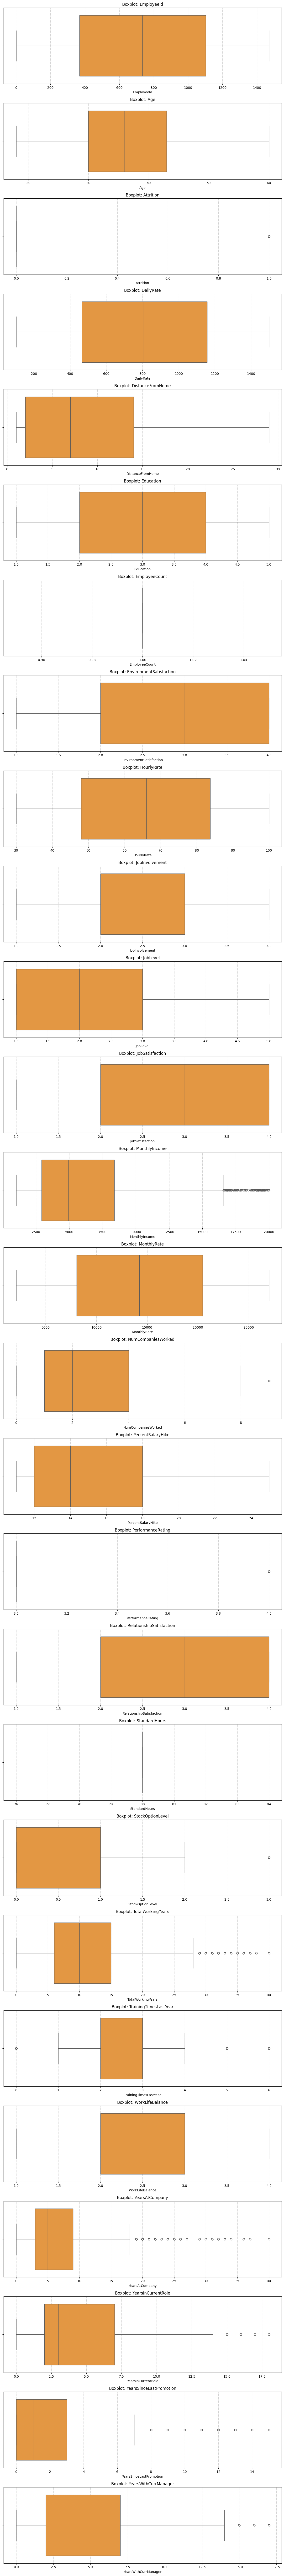

In [ ]:
plot_numeric_boxplots(df_employee)

## **3. Exploratory Data Analysis**

In [ ]:
df_employee_eda = df_employee.copy()

In [ ]:
df_employee_eda.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include=['int', 'float']).columns

Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_employee_eda.select_dtypes(include='float').columns

Index(['Attrition'], dtype='object')

In [ ]:
# Daftar kolom sesuai kategori
pure_numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

In [110]:
df_employee_eda['Attrition'] = df_employee_eda['Attrition'].apply(lambda x: 'Keluar' if x == 1 else 'Tidak Keluar')

### **3.1. Univariate Analysis**

In [111]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [112]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(12, 25), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

In [113]:
def plot_histogram(df, x, hue='Attrition', bins=20):
    """
    Menampilkan histogram variabel numerik dengan pewarnaan berdasarkan kategori hue.

    Parameters:
    df (DataFrame): DataFrame yang berisi data
    x (str): Nama kolom numerik yang ingin diplot di sumbu x
    hue (str): Nama kolom kategori untuk membedakan warna (default: 'Attrition')
    bins (int): Jumlah bin untuk histogram (default: 20)
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=x, hue=hue, multiple='stack', kde=True, bins=bins)
    plt.title(f'{hue} vs {x}')
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [114]:
def plot_pie_chart(df, x, hue):
    """
    Menampilkan ringkasan dan visualisasi pie chart berdasarkan nilai unik dari kolom x,
    dengan distribusi kategori berdasarkan kolom hue.

    Parameters:
    df (DataFrame): Dataset
    x (str): Kolom kategorikal utama (misalnya Gender, Department, dsb)
    hue (str): Kolom kategorikal kedua untuk dibandingkan (misalnya Attrition)
    """
    unique_vals = df[x].unique()
    n = len(unique_vals)
    rows = (n + 2) // 3  # Maksimum 3 pie chart per baris

    for val in unique_vals:
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        # Tampilkan ringkasan tabel
        summary_df = pd.DataFrame({
            'Jumlah Sampel': counts,
            'Persentase (%)': percentages
        })
        print(f"\nRingkasan untuk {x} = {val}")
        print(summary_df)

    print("\nVisualisasi:")

    # Pie chart
    plt.figure(figsize=(16, 5 * rows))
    for i, val in enumerate(unique_vals, 1):
        subset = df[df[x] == val]
        counts = subset[hue].value_counts().sort_index()
        percentages = (counts / counts.sum() * 100).round(1)

        plt.subplot(rows, 3, i)
        plt.pie(counts, labels=[f"{idx} ({p}%)" for idx, p in percentages.items()],
                autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribusi {x} - {val} berdasarkan {hue}')

    plt.tight_layout()
    plt.show()

In [115]:
def plot_kategori_bivariate(df, x, hue='Attrition', colors=None):
    """
    Menampilkan jumlah dan persentase kategori serta stacked bar chart dengan hue dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    x (str): Nama kolom kategorikal utama.
    hue (str): Nama kolom kategorikal kedua (default = 'Attrition').
    colors (list): Daftar warna untuk setiap kategori hue.
    """
    # Crosstab
    crosstab = pd.crosstab(df[x], df[hue])
    percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Tampilkan ringkasan
    print(f"\nRingkasan untuk kolom: {x}")
    summary_df = pd.concat([
        crosstab.rename(columns=lambda val: f"Jumlah {hue}={val}"),
        percent.rename(columns=lambda val: f"Persentase {hue}={val} (%)").round(1)
    ], axis=1)
    print(summary_df)

    print("\nVisualisasi:")

    # Plot stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
    plt.title(f"Distribusi {x} berdasarkan {hue}")
    plt.ylabel("Jumlah")
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

#### Distribusi Attrition


Ringkasan untuk kolom: Attrition
              Jumlah Sampel  Persentase (%)
Attrition                                  
Tidak Keluar           1291            87.8
Keluar                  179            12.2


Visualisasi:


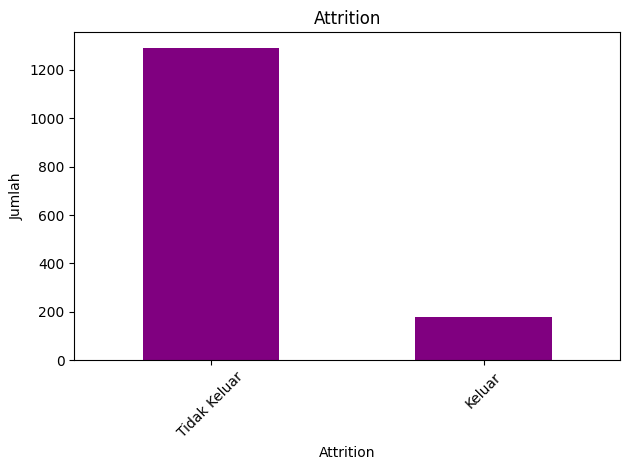

In [116]:
plot_kategori(df_employee_eda, 'Attrition')

#### Distribusi Semua Fitur Numerik

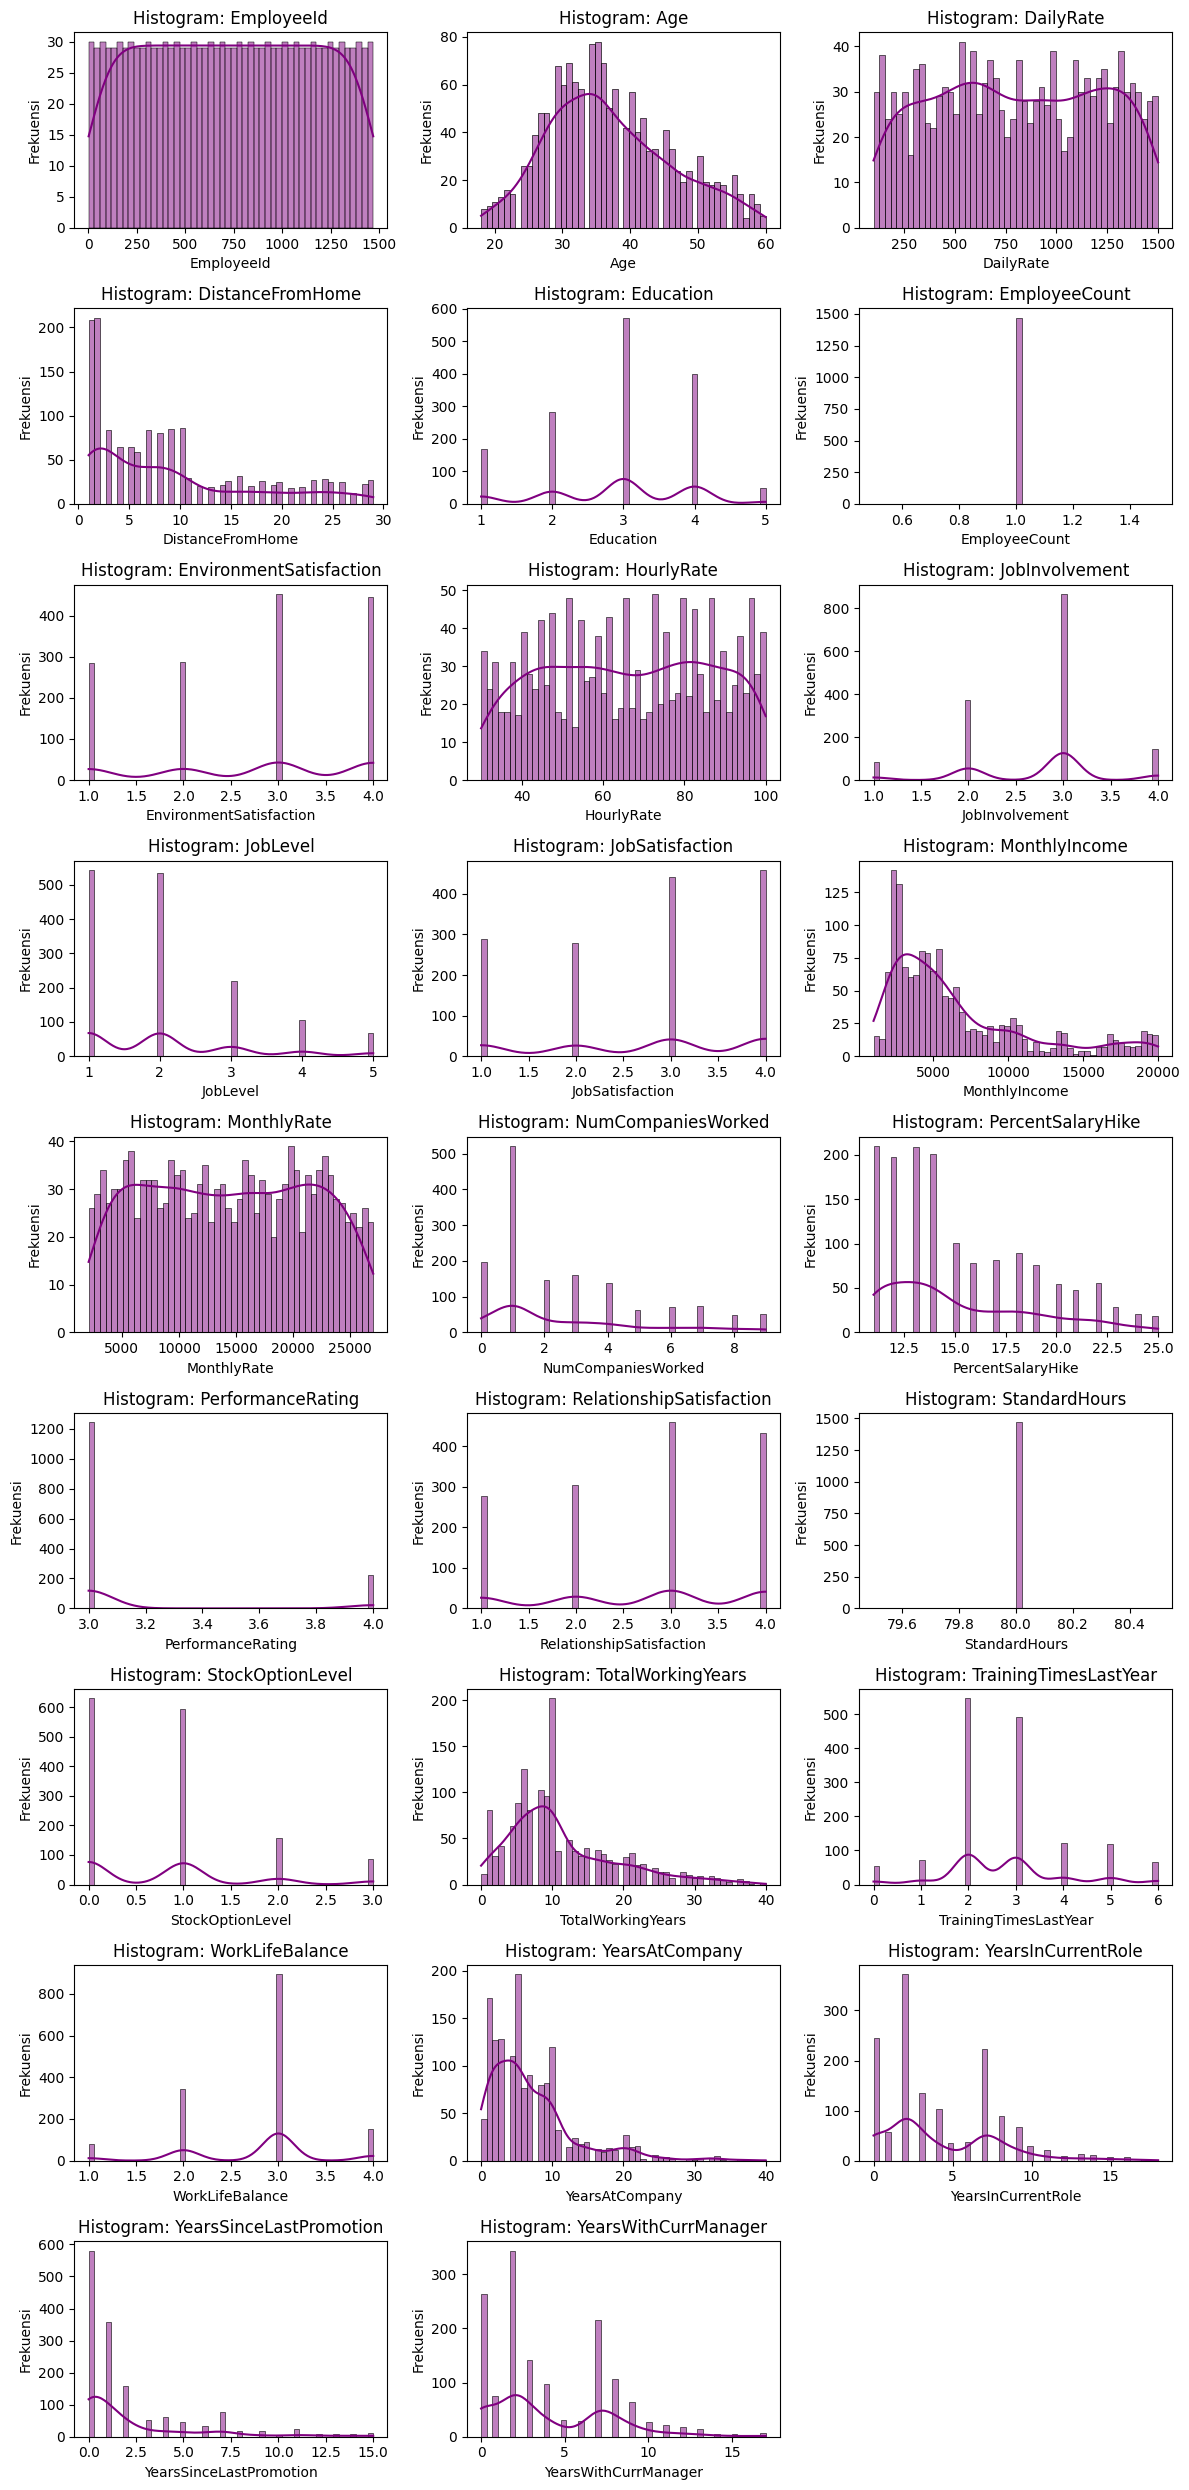

In [117]:
plot_histogram_semua_kolom(df_employee_eda)

### 3.1.2. Bivariate Analysis

#### Analisis Umur, Jenis Kelamin, dan Status Pernikahan

##### Age

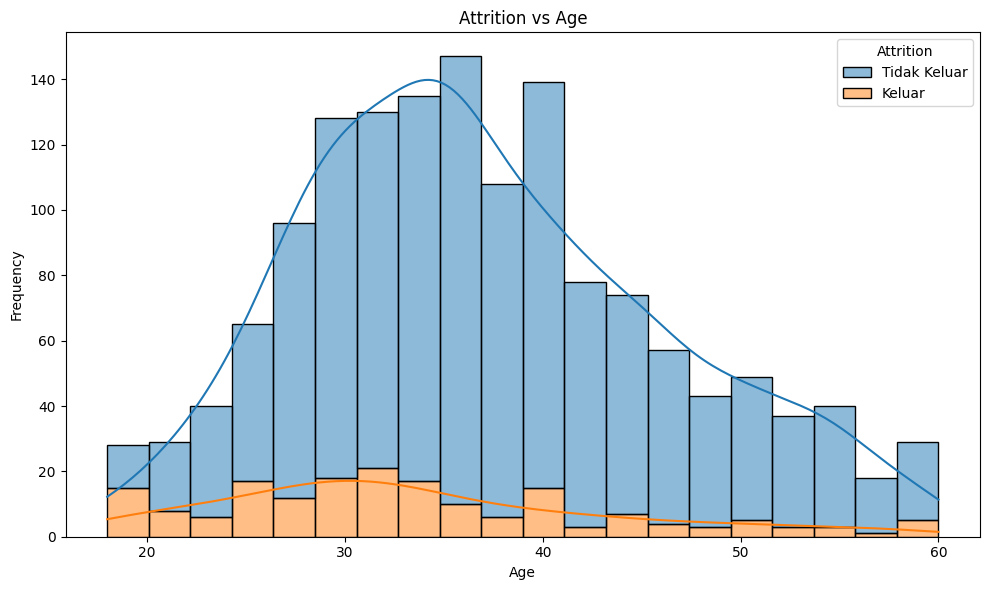

In [118]:
plot_histogram(df_employee_eda, x='Age', hue='Attrition')

##### Gender


Ringkasan untuk Gender = Male
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                  108            12.2
Tidak Keluar            774            87.8

Ringkasan untuk Gender = Female
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   71            12.1
Tidak Keluar            517            87.9

Visualisasi:


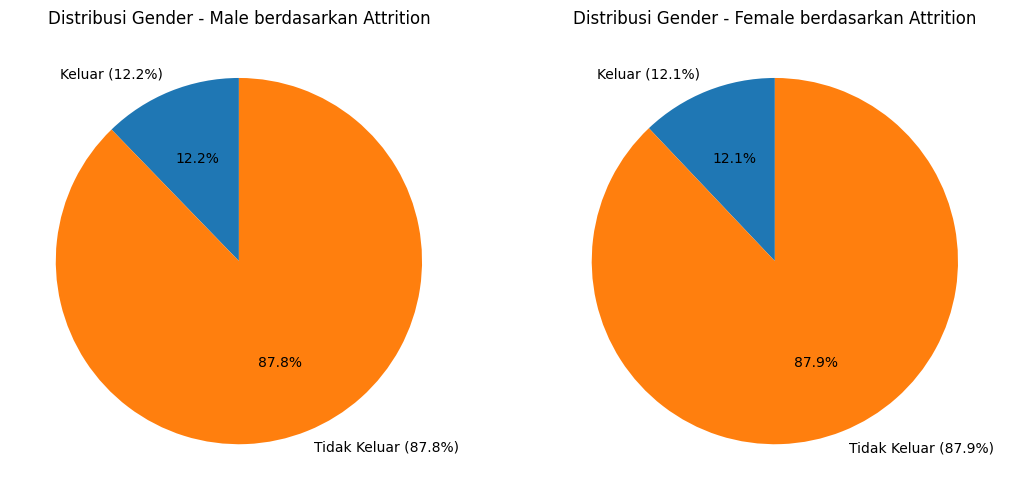

In [119]:
plot_pie_chart(df_employee_eda, x='Gender', hue='Attrition')

##### MaritalStatus


Ringkasan untuk MaritalStatus = Married
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   62             9.2
Tidak Keluar            611            90.8

Ringkasan untuk MaritalStatus = Single
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   94            20.0
Tidak Keluar            376            80.0

Ringkasan untuk MaritalStatus = Divorced
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   23             7.0
Tidak Keluar            304            93.0

Visualisasi:


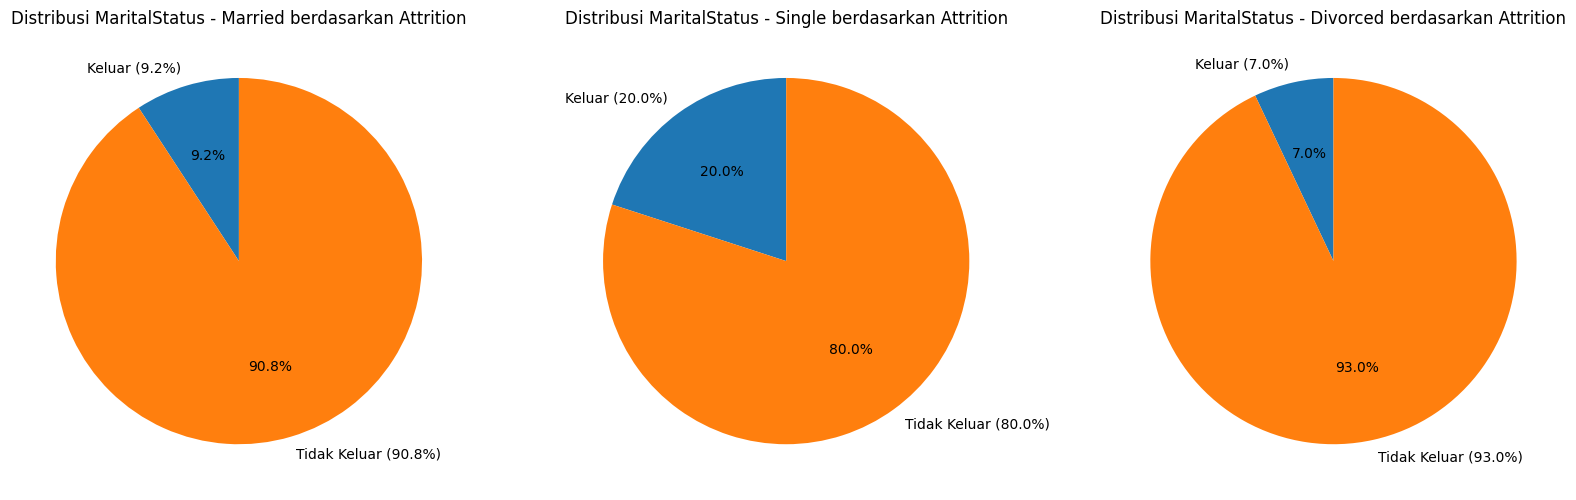

In [120]:
plot_pie_chart(df_employee_eda, x='MaritalStatus', hue='Attrition')

#### Analisis Department, JobRole, dan BusinessTravel

##### Department


Ringkasan untuk kolom: Department
Attrition               Jumlah Attrition=Keluar  \
Department                                        
Human Resources                               6   
Research & Development                      107   
Sales                                        66   

Attrition               Jumlah Attrition=Tidak Keluar  \
Department                                              
Human Resources                                    57   
Research & Development                            854   
Sales                                             380   

Attrition               Persentase Attrition=Keluar (%)  \
Department                                                
Human Resources                                     9.5   
Research & Development                             11.1   
Sales                                              14.8   

Attrition               Persentase Attrition=Tidak Keluar (%)  
Department                                                     

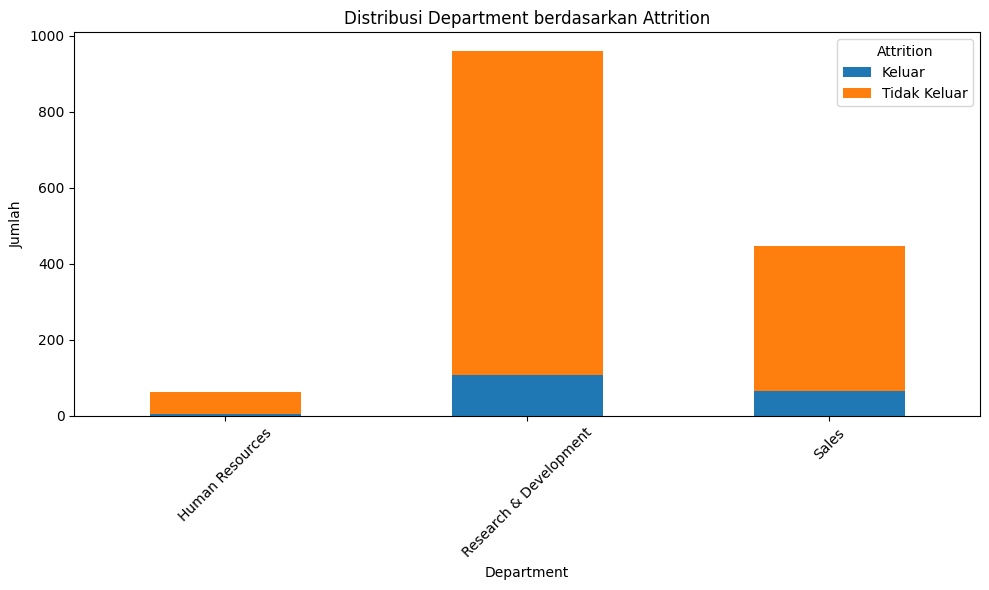

In [121]:
plot_kategori_bivariate(df_employee_eda, x='Department', hue='Attrition')

##### JobRole


Ringkasan untuk kolom: JobRole
Attrition                  Jumlah Attrition=Keluar  \
JobRole                                              
Healthcare Representative                        8   
Human Resources                                  6   
Laboratory Technician                           49   
Manager                                          5   
Manufacturing Director                           7   
Research Director                                2   
Research Scientist                              38   
Sales Executive                                 39   
Sales Representative                            25   

Attrition                  Jumlah Attrition=Tidak Keluar  \
JobRole                                                    
Healthcare Representative                            123   
Human Resources                                       46   
Laboratory Technician                                210   
Manager                                               97   
Manufacturing

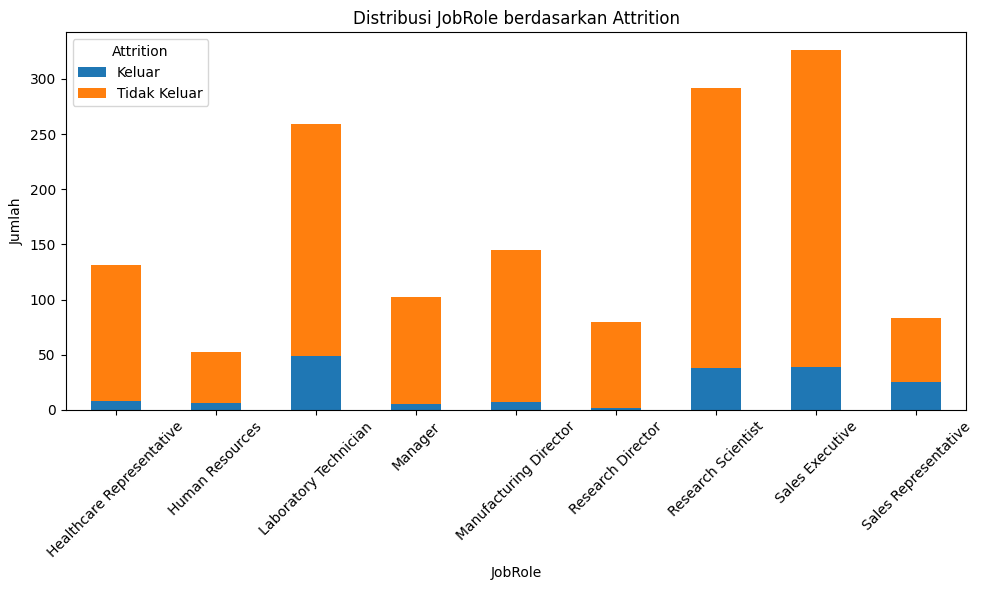

In [122]:
plot_kategori_bivariate(df_employee_eda, x='JobRole', hue='Attrition')

##### BusinessTravel


Ringkasan untuk kolom: BusinessTravel
Attrition          Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
BusinessTravel                                                              
Non-Travel                              11                            139   
Travel_Frequently                       51                            226   
Travel_Rarely                          117                            926   

Attrition          Persentase Attrition=Keluar (%)  \
BusinessTravel                                       
Non-Travel                                     7.3   
Travel_Frequently                             18.4   
Travel_Rarely                                 11.2   

Attrition          Persentase Attrition=Tidak Keluar (%)  
BusinessTravel                                            
Non-Travel                                          92.7  
Travel_Frequently                                   81.6  
Travel_Rarely                                       88.8  

Visualis

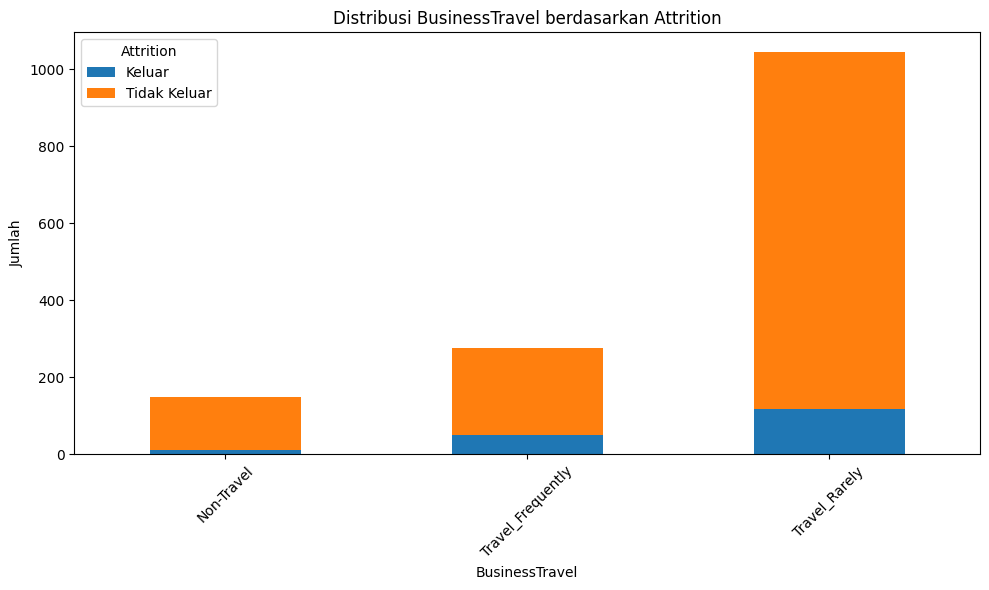

In [123]:
plot_kategori_bivariate(df_employee_eda, x='BusinessTravel', hue='Attrition')

#### Analisis OverTime, WorkLifeBalance, dan JobSatisfaction

##### OverTime


Ringkasan untuk OverTime = Yes
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   98            23.6
Tidak Keluar            318            76.4

Ringkasan untuk OverTime = No
              Jumlah Sampel  Persentase (%)
Attrition                                  
Keluar                   81             7.7
Tidak Keluar            973            92.3

Visualisasi:


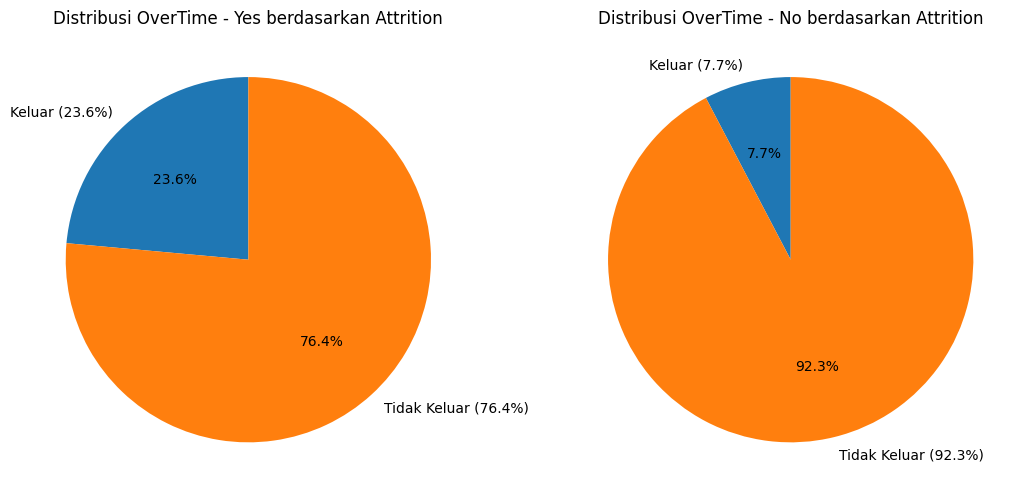

In [124]:
plot_pie_chart(df_employee_eda, x='OverTime', hue='Attrition')

##### WorkLifeBalance


Ringkasan untuk kolom: WorkLifeBalance
Attrition        Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
WorkLifeBalance                                                           
1                                     18                             62   
2                                     45                            299   
3                                     94                            799   
4                                     22                            131   

Attrition        Persentase Attrition=Keluar (%)  \
WorkLifeBalance                                    
1                                           22.5   
2                                           13.1   
3                                           10.5   
4                                           14.4   

Attrition        Persentase Attrition=Tidak Keluar (%)  
WorkLifeBalance                                         
1                                                 77.5  
2                        

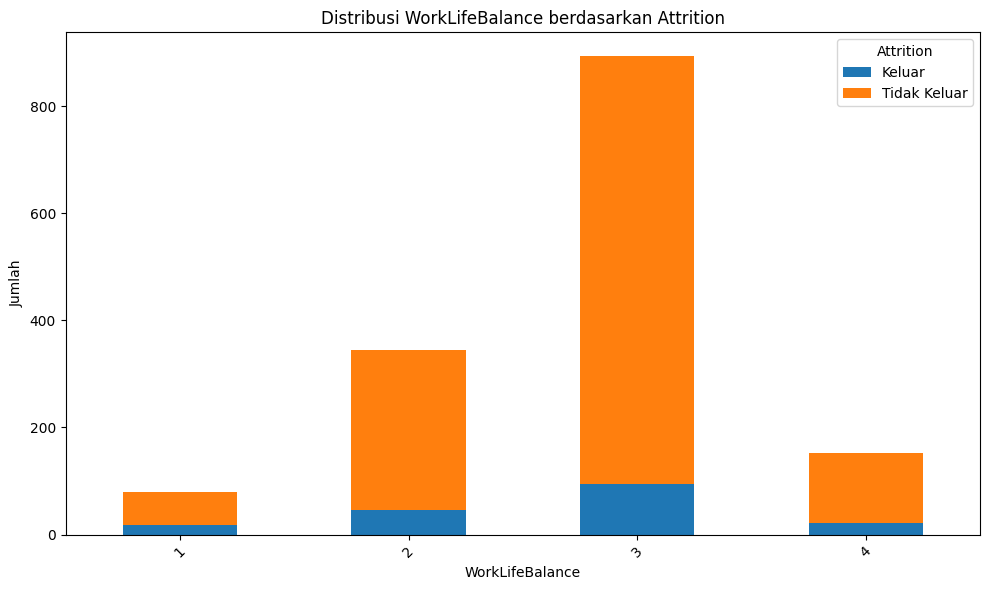

In [125]:
plot_kategori_bivariate(df_employee_eda, x='WorkLifeBalance', hue='Attrition')

##### JobSatisfaction


Ringkasan untuk kolom: JobSatisfaction
Attrition        Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
JobSatisfaction                                                           
1                                     46                            243   
2                                     32                            248   
3                                     62                            380   
4                                     39                            420   

Attrition        Persentase Attrition=Keluar (%)  \
JobSatisfaction                                    
1                                           15.9   
2                                           11.4   
3                                           14.0   
4                                            8.5   

Attrition        Persentase Attrition=Tidak Keluar (%)  
JobSatisfaction                                         
1                                                 84.1  
2                        

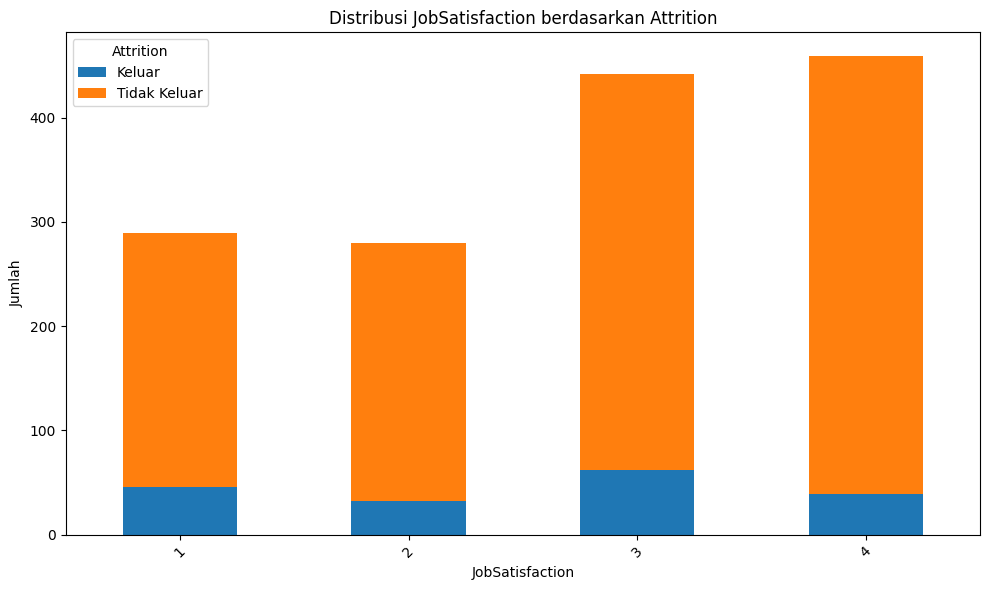

In [126]:
plot_kategori_bivariate(df_employee_eda, x='JobSatisfaction', hue='Attrition')

#### Analisis YearsAtCompany dan NumCompaniesWorked

##### YearsAtCompany


Ringkasan untuk kolom: YearsAtCompany
Attrition       Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
YearsAtCompany                                                           
0                                    11                             33   
1                                    44                            127   
2                                    19                            108   
3                                    18                            110   
4                                    14                             96   
5                                    15                            181   
6                                     8                             68   
7                                     9                             81   
8                                     8                             72   
9                                     5                             77   
10                                   13                            107   

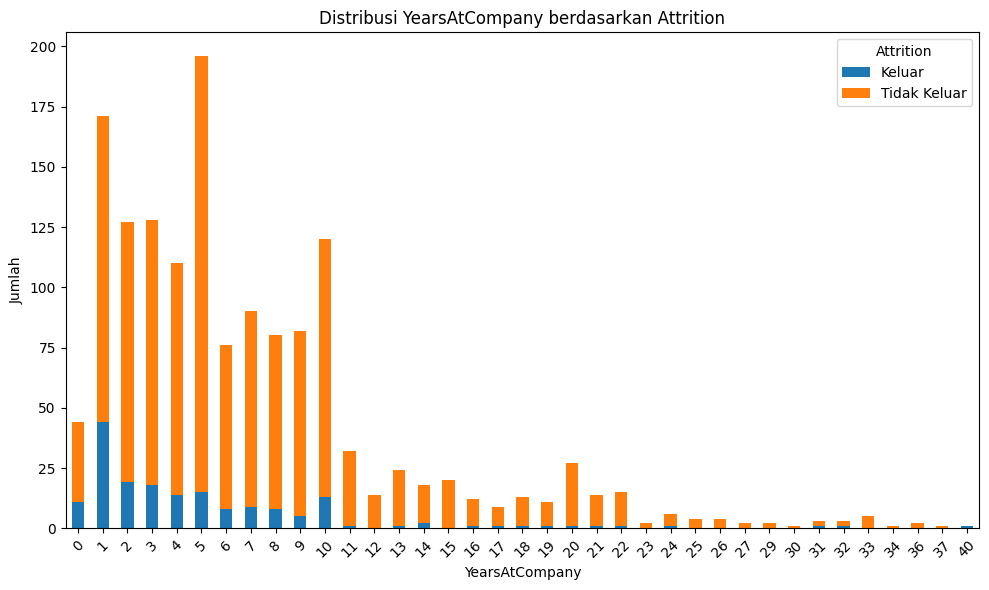

In [127]:
plot_kategori_bivariate(df_employee_eda, x='YearsAtCompany', hue='Attrition')

##### NumCompaniesWorked


Ringkasan untuk kolom: NumCompaniesWorked
Attrition           Jumlah Attrition=Keluar  Jumlah Attrition=Tidak Keluar  \
NumCompaniesWorked                                                           
0                                        19                            178   
1                                        74                            447   
2                                        12                            134   
3                                        11                            148   
4                                        12                            127   
5                                        13                             50   
6                                        11                             59   
7                                        13                             61   
8                                         5                             44   
9                                         9                             43   

Attrition           

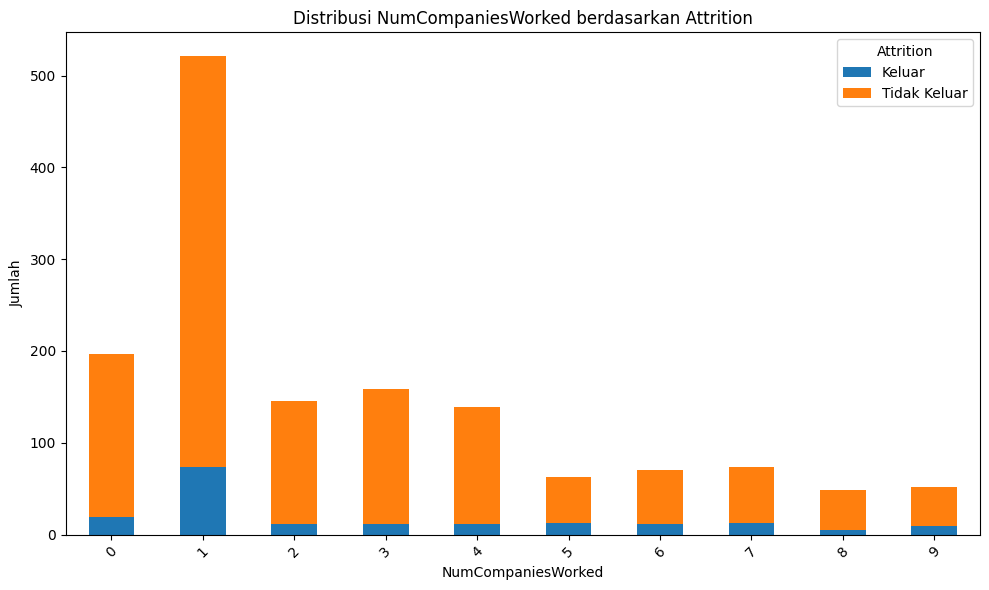

In [128]:
plot_kategori_bivariate(df_employee_eda, x='NumCompaniesWorked', hue='Attrition')

### 3.1.3. Multivariate Analysis

Attrition                   1.000000
DistanceFromHome            0.078074
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
PerformanceRating           0.007755
PercentSalaryHike           0.004907
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
MonthlyIncome              -0.163600
StockOptionLevel           -0.164228
JobLevel                   -0.169201
Age                        -0.172067
TotalWorkingYears          -0.177137
EmployeeCount                    NaN
StandardHours                    NaN
N

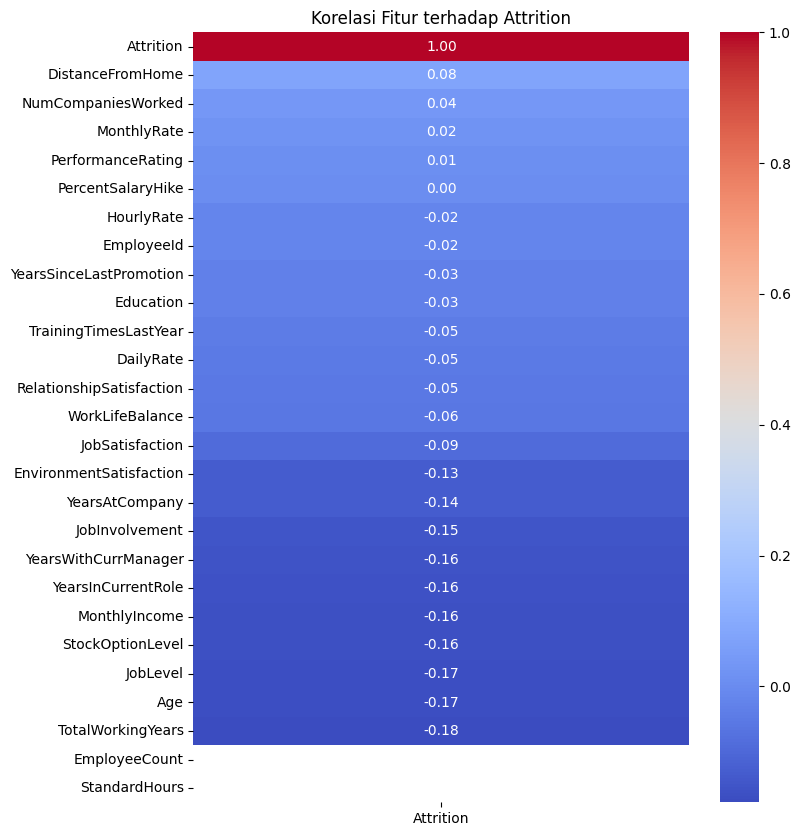

In [145]:
plt.figure(figsize=(8, 10))

correlation_with_attrition = df_employee.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(correlation_with_attrition)
print("\n")

print("Visualisasi:")
sns.heatmap(correlation_with_attrition.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Korelasi Fitur terhadap Attrition")
plt.show()

## **4. Data Preparation**

### 4.1. Menghapus Missing Values

In [129]:
pd.()

SyntaxError: invalid syntax (<ipython-input-129-3febb77a71ac>, line 1)

# Univariate Analysis

#### Categorical Features

In [ ]:
ordinal_categorical_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance'
]

In [ ]:
plot_kategori(df_employee_eda, 'BusinessTravel')

In [ ]:
plot_kategori(df_employee_eda, 'Department')

In [ ]:
plot_kategori(df_employee_eda, 'EducationField')

In [ ]:
plot_kategori(df_employee_eda, 'Gender')

In [ ]:
plot_kategori(df_employee_eda, 'JobRole')

In [ ]:
plot_kategori(df_employee_eda, 'MaritalStatus')

In [ ]:
plot_kategori(df_employee_eda, 'Over18')

In [ ]:
plot_kategori(df_employee_eda, 'OverTime')

In [ ]:
plot_kategori(df_employee_eda, 'Education')

In [ ]:
plot_kategori(df_employee_eda, 'EnvironmentSatisfaction')

In [ ]:
plot_kategori(df_employee_eda, 'JobInvolvement')

In [ ]:
plot_kategori(df_employee_eda, 'JobLevel')

In [ ]:
plot_kategori(df_employee_eda, 'JobSatisfaction')

In [ ]:
plot_kategori(df_employee_eda, 'PerformanceRating')

In [ ]:
plot_kategori(df_employee_eda, 'RelationshipSatisfaction')

In [ ]:
plot_kategori(df_employee_eda, 'StockOptionLevel')

In [ ]:
plot_kategori(df_employee_eda, 'WorkLifeBalance')